In [3]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
exercise = raw_input("nome esercizio: ") 

In [4]:
MODE = "MPI"

if MODE is "COCO":
    protoFile = r"C:\Users\lafacero\Desktop\opencv_test\model\pose_deploy_linevec.prototxt"
    weightsFile = r"C:\Users\lafacero\Desktop\opencv_test\model\pose_iter_440000.caffemodel"
    nPoints = 18
    POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]

elif MODE is "MPI" :
    protoFile = r"C:\Users\lafacero\Desktop\opencv_test\model\pose_deploy_linevec_faster_4_stages.prototxt"
    weightsFile = r"C:\Users\lafacero\Desktop\opencv_test\model\pose_iter_160000.caffemodel"
    nPoints = 15
    POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]

In [6]:
frame = cv2.imread(r"C:\Users\lafacero\Desktop\opencv_test\images\flessioni_2.jpg")
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1

In [8]:
# Load the network and pass the image through the network
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)
inWidth = 368
inHeight = 368

# Prepare the frame to be fed to the network
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

# Set the prepared object as the input blob of the network
# The first 10 layers of the VGGNet are used to create feature maps for the input image.
net.setInput(inpBlob)
output = net.forward()

H = output.shape[2]
W = output.shape[3]
print(output.shape)

(1, 44, 46, 46)


(-0.5, 749.5, 364.5, -0.5)

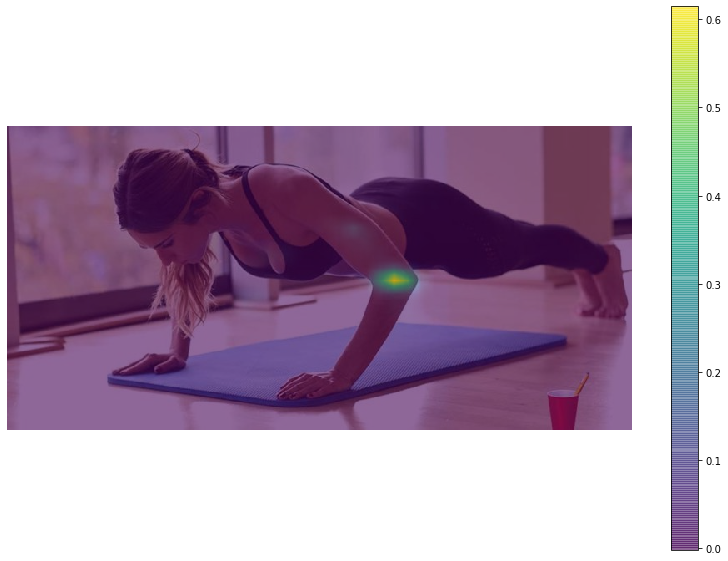

In [11]:
# Slice a probability map from the output for a specific keypoint and 
# plot the heatmap ( after resizing ) on the image itself¶

# A 2-branch multi-stage CNN is used where the first branch predicts a set of 2D confidence maps (S) of body part locations 
# ( e.g. elbow, knee etc.). Given below are confidence maps and Affinity maps for the keypoint – Left Shoulder.
i = 6 #Body part code
probMap = output[0, i, :, :]
probMap = cv2.resize(probMap, (frame.shape[1], frame.shape[0]))
plt.figure(figsize=[14,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.imshow(probMap, alpha=0.6)
plt.colorbar()
plt.axis("off")

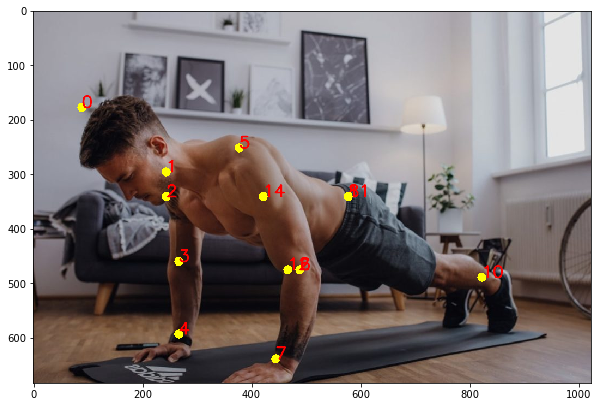

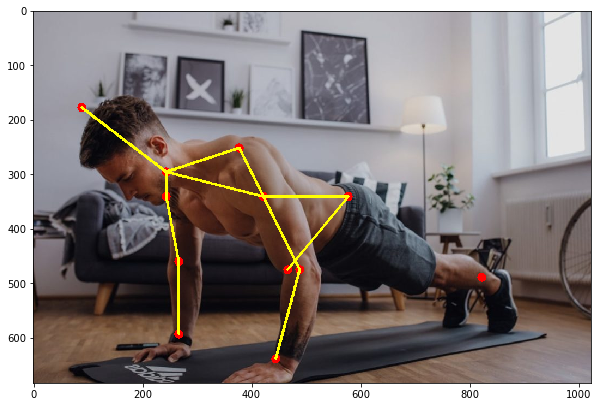

In [25]:
# Next, we find the keypoints for a image with only single person
frame= cv2.imread(r"C:\Users\lafacero\Desktop\opencv_test\images\flessioni.jpg")
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1

# Pass it through the network
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()
H = output.shape[2]
W = output.shape[3]

# gather the points and plot the keypoints and the skeleton figure¶
# Empty list to store the detected keypoints
points = []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold : 
        cv2.circle(frameCopy, (int(x), int(y)), 8, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)
        cv2.circle(frame, (int(x), int(y)), 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 3)

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [26]:
points

[(89, 178),
 (244, 296),
 (244, 341),
 (267, 460),
 (267, 593),
 (378, 252),
 (489, 475),
 (445, 638),
 (578, 341),
 None,
 (823, 489),
 (578, 341),
 (467, 475),
 None,
 (422, 341)]

In [27]:
import json

points_name = ['testa', 'collo', 'spalla_destra', 'gomito_destro', 'polso_destro', 'spalla_sinistra', 'gomito_sinistro', 'polso_sinistro', 'fianco_destro', 'ginocchio_destro', 'caviglia_destra','fianco_sinistro', 'ginocchio_sinistro', 'caviglia_sinistra', 'busto']
print(len(points_name))
print(len(points))

15
15


In [28]:
# a Python object (dict):

json_points= {'name': exercise, 'points' : []}
point_num=0
for point, point_name in zip(points, points_name):
    print({"number": point_num, "point": point_name, "coordinates": point})
    json_points['points'].append({"number": point_num, "point": point_name, "coordinates": point})
    point_num+=1

# convert into JSON:
y = json.dumps(json_points)

{'number': 0, 'point': 'testa', 'coordinates': (89, 178)}
{'number': 1, 'point': 'collo', 'coordinates': (244, 296)}
{'number': 2, 'point': 'spalla_destra', 'coordinates': (244, 341)}
{'number': 3, 'point': 'gomito_destro', 'coordinates': (267, 460)}
{'number': 4, 'point': 'polso_destro', 'coordinates': (267, 593)}
{'number': 5, 'point': 'spalla_sinistra', 'coordinates': (378, 252)}
{'number': 6, 'point': 'gomito_sinistro', 'coordinates': (489, 475)}
{'number': 7, 'point': 'polso_sinistro', 'coordinates': (445, 638)}
{'number': 8, 'point': 'fianco_destro', 'coordinates': (578, 341)}
{'number': 9, 'point': 'ginocchio_destro', 'coordinates': None}
{'number': 10, 'point': 'caviglia_destra', 'coordinates': (823, 489)}
{'number': 11, 'point': 'fianco_sinistro', 'coordinates': (578, 341)}
{'number': 12, 'point': 'ginocchio_sinistro', 'coordinates': (467, 475)}
{'number': 13, 'point': 'caviglia_sinistra', 'coordinates': None}
{'number': 14, 'point': 'busto', 'coordinates': (422, 341)}


In [21]:
y

'{"points": [{"number": 0, "point": "testa", "coordinates": [652, 185]}, {"number": 1, "point": "collo", "coordinates": [600, 317]}, {"number": 2, "point": "spalla_destra", "coordinates": [495, 344]}, {"number": 3, "point": "gomito_destro", "coordinates": [469, 529]}, {"number": 4, "point": "polso_destro", "coordinates": [600, 661]}, {"number": 5, "point": "spalla_sinistra", "coordinates": [704, 370]}, {"number": 6, "point": "gomito_sinistro", "coordinates": [730, 556]}, {"number": 7, "point": "polso_sinistro", "coordinates": [704, 661]}, {"number": 8, "point": "fianco_destro", "coordinates": [521, 609]}, {"number": 9, "point": "ginocchio_destro", "coordinates": [521, 741]}, {"number": 10, "point": "caviglia_destra", "coordinates": [521, 1006]}, {"number": 11, "point": "fianco_sinistro", "coordinates": [626, 609]}, {"number": 12, "point": "ginocchio_sinistro", "coordinates": [834, 741]}, {"number": 13, "point": "caviglia_sinistra", "coordinates": [834, 1006]}, {"number": 14, "point": "

In [65]:
# video capture openCV
cam_width = 1280
cam_height = 720


cap = cv2.VideoCapture(0)
cap.set(3, cam_width)
cap.set(4, cam_height)
success,frame = cap.read()
count = 0

while success:
    success,frame = cap.read()
    cv2.imshow('video', frame)
    count += 1
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

KeyboardInterrupt: 

In [2]:
!pip freeze 

absl-py==0.8.0
aiohttp==3.6.1
alembic==1.3.2
appdirs==1.4.3
argh==0.26.2
astor==0.8.0
astroid==2.1.0
async-timeout==3.0.1
attrs==19.1.0
backcall==0.1.0
bleach==3.1.0
boto3==1.5.22
botocore==1.8.50
certifi==2019.6.16
cffi==1.12.3
chardet==3.0.4
Click==7.0
cloudpickle==1.2.2
colorama==0.4.1
configobj==5.0.6
configparser==4.0.2
cx-Oracle==7.0.0
cycler==0.10.0
Cython==0.29.14
databricks-cli==0.9.1
DateTime==4.3
decorator==4.4.0
defusedxml==0.6.0
dill==0.3.1.1
distlib==0.3.0
docker==4.1.0
docutils==0.14
elasticsearch==7.1.0
entrypoints==0.3
et-xmlfile==1.0.1
feedparser==5.2.1
filelock==3.0.12
fire==0.2.1
Flask==1.1.1
fsspec==0.3.6
future==0.17.1
gast==0.3.2
gdown==3.9.1
gevent==1.4.0
gitdb2==2.0.6
GitPython==3.0.5
google-pasta==0.1.7
gorilla==0.3.0
greenlet==0.4.15
grpcio==1.24.0
h5py==2.10.0
idna==2.8
imageio==2.6.1
importlib-metadata==1.5.0
ipykernel==5.1.1
ipython==7.7.0
ipython-genutils==0.2.0
ipywidgets==7.5.0
isort==4.3.4
itsdangerous==1.1.0
JayDeBeApi==1.1.1
jdcal==1.4.1
jedi==0.14.1